# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt

In [221]:
df= pd.read_csv("Train_Titanic.csv")

In [222]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Visualizing the Data

In [224]:
print(len(df))

891


In [225]:
survive= df[df['Survived']==1]
noSurvive= df[df['Survived']==0]


In [226]:
print("Survived = ", len(survive))
print("No Survive = ", len(noSurvive))

Survived =  342
No Survive =  549


In [227]:
print("Percentage of Survived Pessanger = ", (len(survive)/len(df)*100))

Percentage of Survived Pessanger =  38.38383838383838


In [228]:
print("Percentage of Not Survived Pessanger = ", (len(noSurvive)/len(df)*100))

Percentage of Not Survived Pessanger =  61.61616161616161


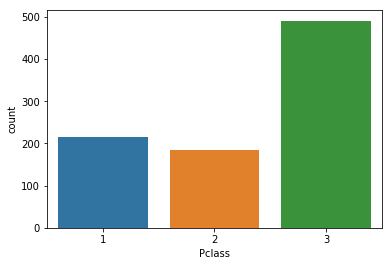

In [229]:
sns.countplot(x="Pclass", data=df)

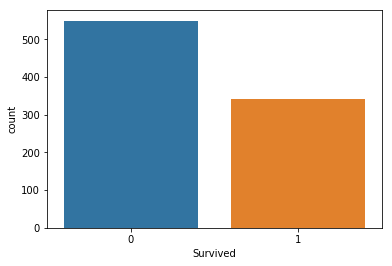

In [230]:
sns.countplot(x="Survived", data=df)

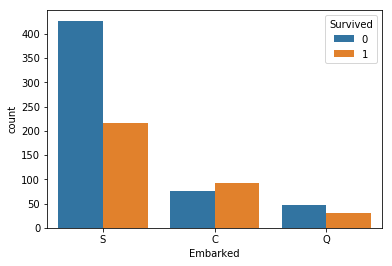

In [231]:
sns.countplot(x="Embarked", hue="Survived", data=df)

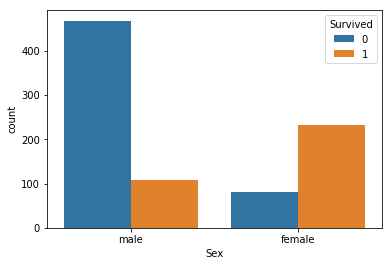

In [232]:
#Visulize to know the number of males and females

sns.countplot(x="Sex", hue="Survived", data=df)


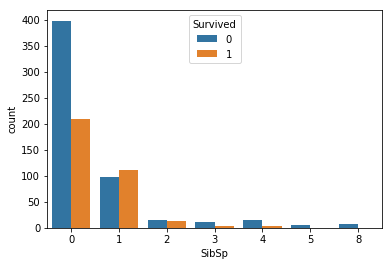

In [233]:
sns.countplot(x="SibSp", hue="Survived", data=df)

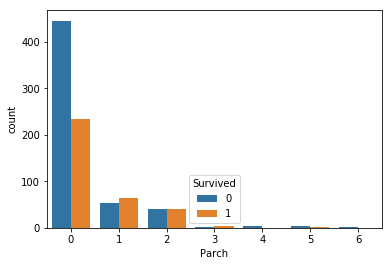

In [234]:
sns.countplot(x="Parch", hue="Survived", data=df)

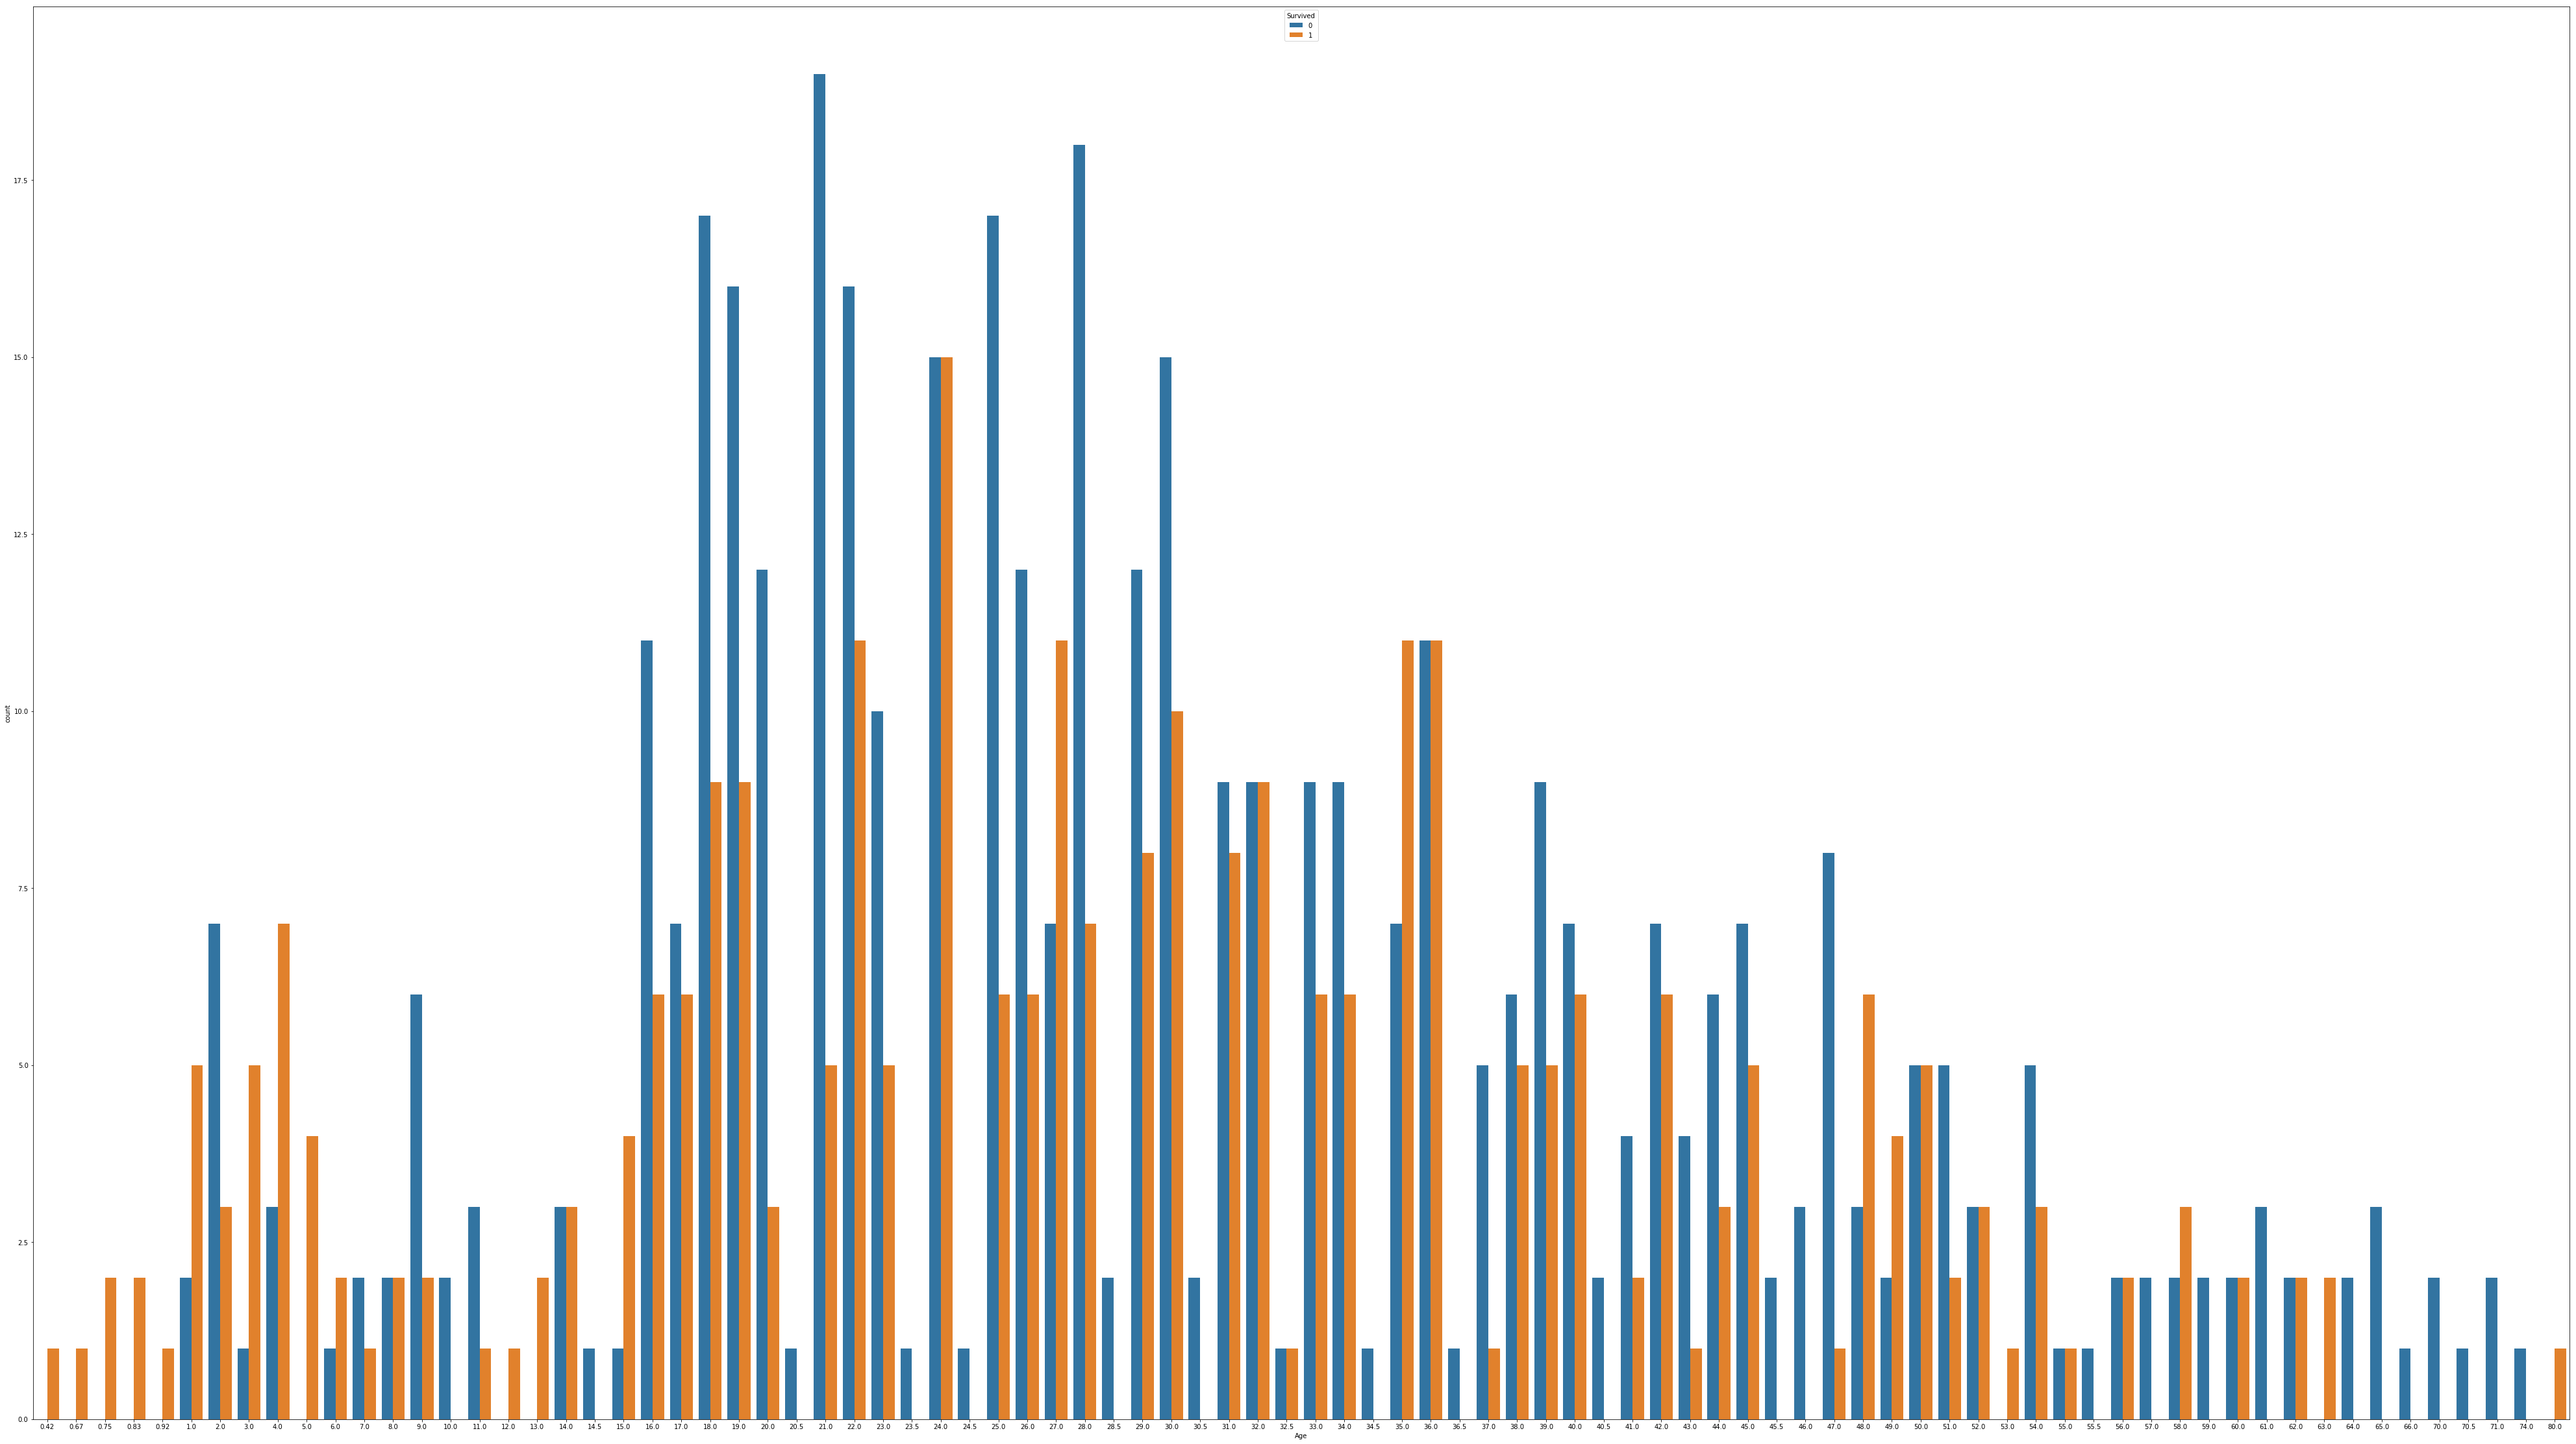

In [235]:
plt.figure(figsize=[70,40])#We expected here more data thats why we chnge the figure size
sns.countplot(x="Age", hue="Survived", data=df)

In [236]:
#by using histoogram we can check the age wise people on the ship

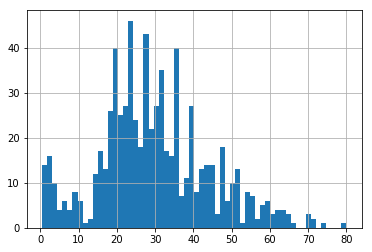

In [237]:
df["Age"].hist(bins=60)

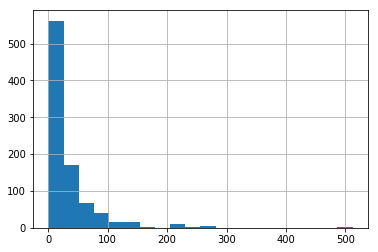

In [238]:
df["Fare"].hist(bins=20)

# Data Prepearation

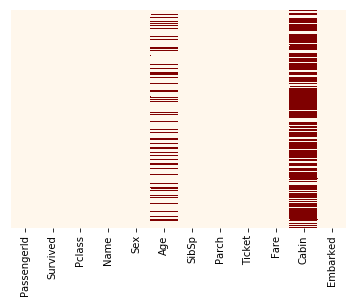

In [239]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='OrRd')

In [240]:
df.drop("Cabin", axis=1,inplace=True)

In [241]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [242]:
#We can drop Name, Ticket, Embarked,PID cause of not much importance 

In [243]:
df.drop(['Name', 'Ticket', 'Embarked','PassengerId'],axis = 1, inplace=True)

In [244]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


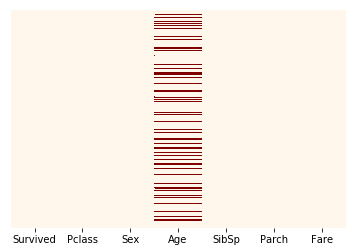

In [245]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='OrRd')

In [246]:
df['Age'].isnull().sum()

177

In [247]:
df1= df[["Age"]].mean()

In [248]:
print(df1)

Age    29.699118
dtype: float64


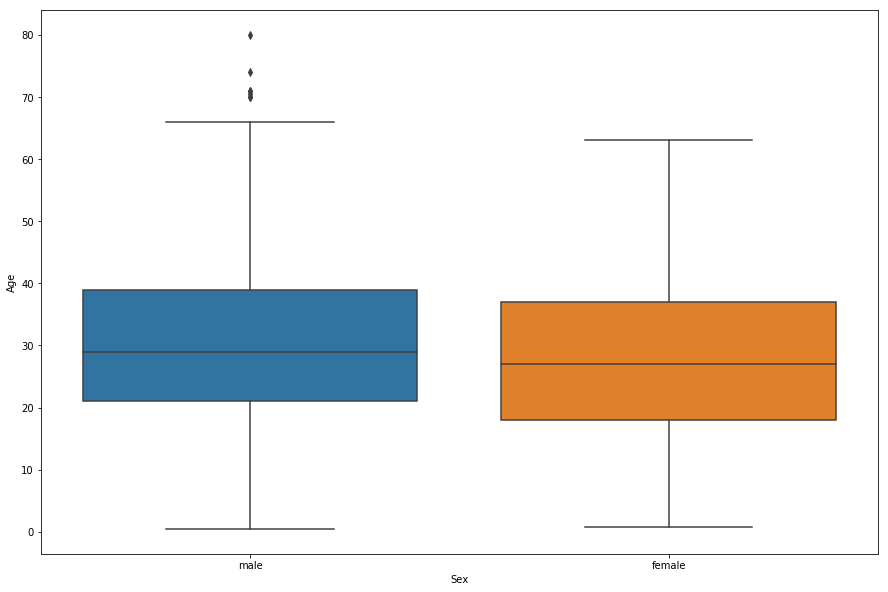

In [249]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=df)

In [250]:
def FillAge(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [251]:
df['Age']= df[["Age", "Sex"]].apply(FillAge, axis=1)

In [252]:
df['Age'].isnull().sum()#Verified ther is no NaN data left

0

In [253]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [254]:
#We have to get dummies for sex in catrgories 0 and 1
pd.get_dummies(df['Sex']).head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [255]:
#From this,if we have only one column then we can easily guess for male and female
male = pd.get_dummies(df['Sex'])
male.drop(['female'],axis=1, inplace=True)
male.head()


,male
0,1
1,0
2,0
3,0
4,1


In [256]:
# first let's drop the  sex 
df.drop(['Sex'], axis=1, inplace=True)

In [257]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [258]:
#ADD Male to actual dataframe
df= pd.concat([df,male], axis=1)

In [259]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Model Training

In [261]:
#Let's drop the target coloumn before we do train test split
X = df.drop('Survived',axis=1).values
y = df['Survived'].values


In [269]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
#import sklearn 

In [262]:
from sklearn.model_selection import train_test_split

In [272]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10, test_size=0.2)

In [273]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Sunny\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# Model Evaluation and Testing

In [274]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [275]:
from sklearn.metrics import confusion_matrix

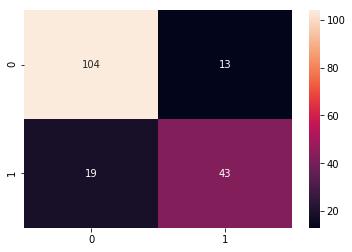

In [276]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [277]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

   micro avg       0.82      0.82      0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [279]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.8212290502793296

# Finished